В цьому ДЗ потренуємось виконувати Z-тести для тестування гіпотез в різних задачах. Для коректної імплементації та інтерпретації тестів рекоемндую переглянути спершу документацію:

https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.ztest.html

### Завдання 1: Z-тест для однієї вибірки

**Мета**: Перевірити, чи середнє значення вибірки відрізняється від гіпотетичного середнього.

**Припущення**: Середній ріст студентів університету вважається 170 см. Ми хочемо перевірити, чи середній ріст випадкової вибірки студентів істотно більший. Вибірка задана в змінній `heights`.

Для виконання завдання імпортуйте метод для проведення `ztest`, виконайте Z-тест з Python, виведіть p-value і зробіть заключення, чи справдилось припущення про середній зріст студентів на рівні значущості 0.05?

Використовуємо тут Z-тест, оскільки вибірка достатньо велика (більше 30 екземплярів) і можемо вважати, що її стандартне відхилення близьке до ст. відхилення генеральної сукупності, а значить - відоме.

In [2]:
import numpy as np
import math as math
from statsmodels.stats.weightstats import ztest

In [3]:
heights = [174, 171, 175, 179, 170, 170, 179, 175, 169, 174, 169, 169, 173, 162, 163, 169, 166,
           173, 167, 164, 179, 170, 172, 164, 169, 175, 169, 174, 169, 169, 173, 162, 177]

In [4]:
mean_heights = np.array(heights).mean()
st_heights = np.array(heights).std()
print(mean_heights)
print(st_heights)

170.6969696969697
4.648133209409457


In [5]:
ztest_Score, p_value = ztest(heights, value = 170, alternative='larger')

In [6]:
ztest_Score, p_value*100

(np.float64(0.8482235371587619), np.float64(19.815674571091748))

#Висновок 1:
Середній зріст по вибірці становить 170.7 см. p_value=0.19, отже відхилити H0 гіпотезу не можна. Не можна стверджувати, що зріст студентів значуще вищий за 170 см. Приймаємо, що отримана різниця в 0,7 см є випадковістю.

### Завдання 2: Z-тест для двох незалежних вибірок

**Завдання 2.1.**

**Мета**: Перевірити, чи існує статистична різниця між середніми оцінками двох груп студентів.

**Припущення**: Група A отримала новий навчальний курс, а група B продовжувала зі стандартним курсом. Ми перевіряємо, чи є новий курс ефективнішим.

Виконайте Z-тест з Python, виведіть p-value і зробіть заключення, чи справдилось припущення щодо студентів на рівні значущості 0.05?

In [7]:
group_a_scores = [78.55, 72.25, 79.88, 75.  , 76.54, 74.99, 87.26, 77.93, 72.71,
       82.11, 71.9 , 79.04, 68.2 , 71.36, 78.98, 81.69, 78.86, 77.42,
       76.49, 70.61, 74.4 , 75.7 , 83.29, 79.72, 69.18, 79.62, 76.07,
       74.62, 81.06, 83.15, 82.66, 73.8 , 76.45, 79.66, 82.88, 75.6 ,
       77.07, 72.47, 72.02, 82.06]

group_b_scores = [81.78, 74.64, 80.02, 76.81, 71.77, 76.81, 82.69, 74.82, 82.82,
       61.9 , 79.11, 75.44, 73.5 , 75.46, 65.06, 73.9 , 76.79, 82.39,
       72.41, 70.96, 72.49, 79.58, 76.64, 72.35, 77.57, 75.49, 79.84,
       71.49, 73.36, 73.04, 67.68, 76.48, 76.31, 75.03, 73.83, 67.92,
       72.9 , 73.29, 70.99, 74.19]

In [8]:
group_a_scores=np.array(group_a_scores)
group_b_scores=np.array(group_b_scores)

In [9]:
print(group_a_scores.mean())
print(group_b_scores.mean())
print(group_a_scores.std())
print(group_b_scores.std())


77.08125
74.73875000000001
4.3108706704678585
4.463902545699223


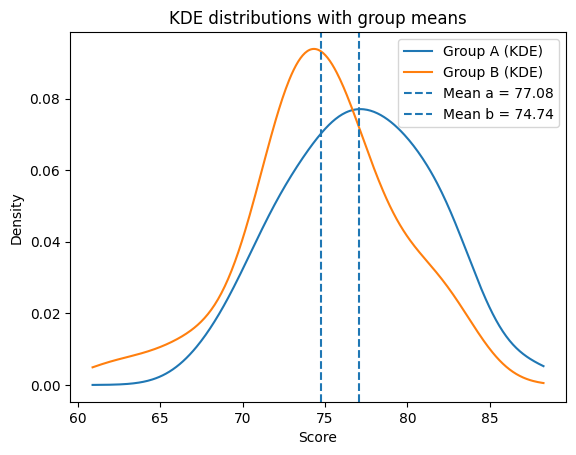

In [10]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde


kde_a = gaussian_kde(group_a_scores)
kde_b = gaussian_kde(group_b_scores)

x_min = min(group_a_scores.min(), group_b_scores.min())
x_max = max(group_a_scores.max(), group_b_scores.max())
x = np.linspace(x_min - 1, x_max + 1, 400)

plt.figure()
plt.plot(x, kde_a(x), label="Group A (KDE)")
plt.plot(x, kde_b(x), label="Group B (KDE)")


mean_a = group_a_scores.mean()
mean_b = group_b_scores.mean()
plt.axvline(mean_a, linestyle="--", label=f"Mean a = {mean_a:.2f}")
plt.axvline(mean_b, linestyle="--", label=f"Mean b = {mean_b:.2f}")


plt.xlabel("Score")
plt.ylabel("Density")
plt.title("KDE distributions with group means")
plt.legend()
plt.show()

In [11]:
ztest_Score, p_value = ztest(group_a_scores, group_b_scores,  value = 0, alternative='larger')
ztest_Score, p_value

(np.float64(2.357354864751502), np.float64(0.009202824276264005))

#Висновок 2.1
p_value=0.009 (<0.05), отже робимо висновок, що новий навчальний курс показує краще результати.

**Завдання 2.2.**


**Мета**: Побачити, як впливає розмір вибірок на результат тесту.

**Завдання**: Уявіть, що з групи А ми маємо тільки перші 5 записів, а з групи В - усі. Таке могло статись, якщо ми вже маємо результати тестів учнів за попередньою програмою, а тести за новою програмою здали наразі лише 5 учнів і ми вирішили не чекати довше.
Виберіть перші 5 записів для групи А і проведіть t-test (для цього використовуємо наступний [метод](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)). Виведіть значення p-value. Зробіть висновок, який результат ви бачите щодо стат. значущості на рівні 0.05 для цього експерименту?

Тут проводимо t-test оскільки одна з вибірок - дуже мала.

In [13]:
group_a_scores_new=group_a_scores[0:5]
print(group_a_scores_new.mean())
print(group_b_scores.mean())
print(group_a_scores_new.std())
print(group_b_scores.std())

76.444
74.73875000000001
2.6804969688473803
4.463902545699223


In [15]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(
    group_a_scores_new,
    group_b_scores,
    equal_var=True,  ## !!!
    alternative="greater"
)
t_stat, p_value

(np.float64(0.8167951030410814), np.float64(0.20927397387678665))

In [16]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(
    group_a_scores_new,
    group_b_scores,
    equal_var=False, ## !!!
    alternative="greater"
)
t_stat, p_value

(np.float64(1.1226527301193456), np.float64(0.1505368495172156))

#Висновок
Експеримент втратив значимість. Не можна відхилити H0 про нерівність балів після проходження різних курсів.


### Завдання 3\*: Z-тест для двох **пов'язаних** вибірок

**Мета**: Перевірити, чи вплинув тренінг на продуктивність працівників, коли всі справробітники проходили тренінг.

**Припущення**: Наші працівники проходять однаковий тренінг, і ми хочемо з'ясувати, чи покращилися їхні показники після тренінгу на рівні значущості 0.05. Виконайте Z-тест з Python, виведіть p-value і зробіть заключення, чи поліпшились показники працівників на рівні значущості 0.05?

Зверніть увагу, ці вибірки повʼязані між собою, значить не буде коректно виконати z-test між ними, натомість, ми можемо порівняти, чи різниця в результатах (продуктивності співробітників) є стат значущою.

In [ ]:
before_training = [57.82, 37.63, 36.8 , 55.22, 52.97, 52.5 , 53.46, 43.2 , 52.32,
       52.93, 42.86, 68.66, 54.74, 38.09, 56.57, 40.25, 57.87, 61.59,
       41.79, 59.63, 54.13, 58.22, 68.97, 47.55, 42.46, 41.1 , 41.84,
       49.23, 53.41, 52.77]

after_training = [62.47, 40.66, 42.7 , 57.69, 61.41, 56.76, 54.75, 44.06, 56.29,
       55.48, 47.28, 72.6 , 57.59, 39.39, 56.54, 42.36, 62.58, 65.01,
       42.3 , 62.98, 57.9 , 59.45, 72.28, 50.66, 43.18, 44.82, 45.96,
       54.4 , 58.52, 53.01]

In [ ]:
diff=np.array(after_training) - np.array(before_training)
diff

array([ 4.65,  3.03,  5.9 ,  2.47,  8.44,  4.26,  1.29,  0.86,  3.97,
        2.55,  4.42,  3.94,  2.85,  1.3 , -0.03,  2.11,  4.71,  3.42,
        0.51,  3.35,  3.77,  1.23,  3.31,  3.11,  0.72,  3.72,  4.12,
        5.17,  5.11,  0.24])

In [ ]:
ztest_Score, p_value = ztest(diff,  value = 0, alternative='larger')
ztest_Score, p_value

(np.float64(9.13890009623916), np.float64(3.1545359919175505e-20))

#Висновок
Після проходження тренінгу працівники підвищили свою продуктивність.